# Using SPDR S&P 500 ETF Trust historical data to simulate its future price trend with 95% confidence interval

In [130]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [131]:
# set seed
np.random.seed(5)

In [132]:
# reading in the data
df = pd.read_csv("SPY_6month.csv", parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/5/2021,403.459991,406.940002,403.380005,406.359985,403.741425,91684800.0
1,4/6/2021,405.760010,407.239990,405.399994,406.119995,403.502991,62021000.0
2,4/7/2021,405.940002,406.959991,405.450012,406.589996,403.969940,55836300.0
3,4/8/2021,407.929993,408.579987,406.929993,408.519989,405.887512,57863100.0
4,4/9/2021,408.390015,411.670013,408.260010,411.489990,408.838379,61104600.0


In [133]:
# developing change column
df["change"] = df["Open"] - df["Adj Close"] 
df = df.drop(df.index[126])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,change
0,4/5/2021,403.459991,406.940002,403.380005,406.359985,403.741425,91684800.0,-0.281434
1,4/6/2021,405.760010,407.239990,405.399994,406.119995,403.502991,62021000.0,2.257019
2,4/7/2021,405.940002,406.959991,405.450012,406.589996,403.969940,55836300.0,1.970062
3,4/8/2021,407.929993,408.579987,406.929993,408.519989,405.887512,57863100.0,2.042481
4,4/9/2021,408.390015,411.670013,408.260010,411.489990,408.838379,61104600.0,-0.448364


In [134]:
# modifying change df column to np array
change = df["change"].to_numpy()
change[0:5]

array([-0.281434,  2.257019,  1.970062,  2.042481, -0.448364])

In [135]:
# simulating 1 year
def yearSimulation(price: np.float64, possible_changes: np.ndarray):
    #function to get 100 prices with random price changes 
    price_track = np.zeros(100)
    for i in range(100):
        if i == 0:
            price_track[i] = price
        else:
            price += np.random.choice(possible_changes)
            price_track[i] = price
    
    return price_track

In [136]:
#10000 simulations
def Simulate(number_simulations: int,starting_price: np.float64, possible_changes: np.ndarray):
    matrix = np.zeros((number_simulations,100))

    #loop to fill matrix from starting price adj close
    for iteration in range(number_simulations):
        matrix[iteration] = yearSimulation(starting_price, possible_changes = possible_changes)
    x = np.arange(0,100)
    y = matrix.mean(0)
    y1 = np.percentile(matrix,2.5, axis=0)
    y2 = np.percentile(matrix,97.5, axis=0)
    return x,y,y1,y2


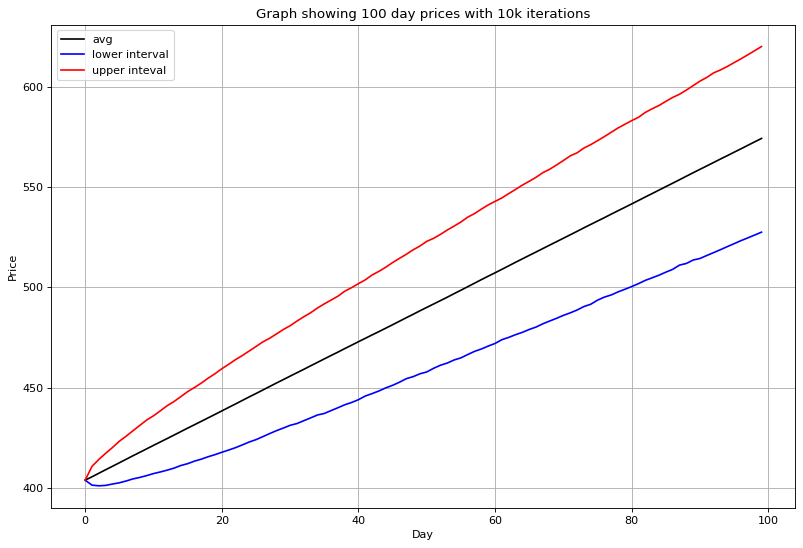

In [137]:
#plotting the graph
def plot():
    x,y,y1,y2 = Simulate(number_simulations=10000, starting_price = df["Adj Close"][0],possible_changes=change )
    figure(figsize=(12, 8), dpi=80)
    plt.plot(x, y, ls='-', c='black', label='avg')
    plt.plot(x, y1, ls='-', c='blue', label='lower interval')
    plt.plot(x, y2, ls='-', c='red', label='upper inteval')
    plt.title("Graph showing 100 day prices with 10k iterations")
    plt.grid(which='both')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.show()
plot()